In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip

--2020-06-23 13:41:12--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  14.0MB/s    in 15s     

2020-06-23 13:41:27 (12.5 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



In [4]:
!unzip -n ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [5]:
!ls

ml-20m	ml-20m.zip  sample_data


In [6]:
df = pd.read_csv('ml-20m/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [7]:
# Setting our own id's for userId and movieId as hthey may not be numbered from 0...N-1

df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [8]:
df.head()

,userId,movieId,rating,timestamp,new_user_id,new_movie_id
0,1,2,3.5,1112486027,0,1
1,1,29,3.5,1112484676,0,28
2,1,32,3.5,1112484819,0,31
3,1,47,3.5,1112484727,0,46
4,1,50,3.5,1112484580,0,49


In [9]:
# Getting user IDs, movie IDs and ratings in separate arrays

user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [10]:
print(type(user_ids))
print(type(set(user_ids)))
print(len(user_ids))
print(len(movie_ids))

<class 'numpy.ndarray'>
<class 'set'>
20000263
20000263


In [11]:
# No. of users and movies

N = len(set(user_ids))
M = len(set(movie_ids))
print(' N:', N, '\n', 'M:', M)

# Setting embedding dimension
K = 10

 N: 138493 
 M: 26744


In [12]:
# Making a Neural Network

u = Input(shape=(1,))
m = Input(shape=(1,))

u_emb = Embedding(N, K)(u) # output-shape of this layer (num_samples, 1, K)
m_emb = Embedding(M, K)(m) # output-shape of this layer (num_samples, 1, K)

u_emb = Flatten()(u_emb) # output-shape of this layer (num_samples, K)
m_emb = Flatten()(m_emb) # output-shape of this layer (num_Samples, K)

x = Concatenate()([u_emb, m_emb]) # output-shape of this layer (num_sample, 2K)

x = Dense(1024, activation='relu')(x)
x = Dense(400, activation='relu')(x)
x = Dense(400, activation='relu')(x)
x = Dense(1)(x)



In [13]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
    loss='mse',
    optimizer=SGD(lr=0.08, momentum=0.9),
)

In [14]:
# Splitting the data

user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)
Ntrain = int(0.8 * len(ratings))

train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

# Centering the ratings
avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [15]:
r = model.fit(
    x=[train_user, train_movie], 
    y=train_ratings,
    epochs=25,
    batch_size=1024,
    verbose=2,
    validation_data=([test_user, test_movie], test_ratings)
)

Epoch 1/25
15626/15626 - 71s - loss: 0.7812 - val_loss: 0.7288
Epoch 2/25
15626/15626 - 71s - loss: 0.7039 - val_loss: 0.7011
Epoch 3/25
15626/15626 - 71s - loss: 0.6834 - val_loss: 0.6913
Epoch 4/25
15626/15626 - 71s - loss: 0.6674 - val_loss: 0.6787
Epoch 5/25
15626/15626 - 71s - loss: 0.6551 - val_loss: 0.6719
Epoch 6/25
15626/15626 - 71s - loss: 0.6431 - val_loss: 0.6633
Epoch 7/25
15626/15626 - 70s - loss: 0.6299 - val_loss: 0.6527
Epoch 8/25
15626/15626 - 70s - loss: 0.6148 - val_loss: 0.6568
Epoch 9/25
15626/15626 - 70s - loss: 0.6032 - val_loss: 0.6430
Epoch 10/25
15626/15626 - 71s - loss: 0.5941 - val_loss: 0.6384
Epoch 11/25
15626/15626 - 70s - loss: 0.5860 - val_loss: 0.6499
Epoch 12/25
15626/15626 - 69s - loss: 0.5781 - val_loss: 0.6341
Epoch 13/25
15626/15626 - 69s - loss: 0.5703 - val_loss: 0.6324
Epoch 14/25
15626/15626 - 69s - loss: 0.5626 - val_loss: 0.6310
Epoch 15/25
15626/15626 - 70s - loss: 0.5560 - val_loss: 0.6330
Epoch 16/25
15626/15626 - 69s - loss: 0.5505 - va

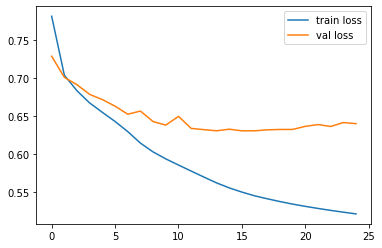

In [16]:
# Plotting Losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="val loss")
plt.legend()
plt.show()